# Exploratory Data Analysis
This is a separate work space for the EDA, which will then be implemented into the technical report
I think the most important attributes are:
* heart_disease
* bmi
* smoking_status
* avg_glucose_level
* hypertension
* age

Gather data into a variable

In [14]:
import importlib
import os
import matplotlib.pyplot as plt

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

import myEDA.utils
importlib.reload(myEDA.utils)
import myEDA.utils as eda_utils

import myEDA.plot_utils
importlib.reload(myEDA.plot_utils)
import myEDA.plot_utils as plot_utils

import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

fname = os.path.join("input_data", "stroke-data-downsized.csv")
table = mysklearn.mypytable.MyPyTable().load_from_file(fname)

fname = os.path.join("input_data", "stroke-data-cleaned-numeric.csv")
numeric_table = mysklearn.mypytable.MyPyTable().load_from_file(fname)

## Multiple Frequency Diagrams

#### Smoking Status

['Unknown', 'formerly smoked', 'never smoked', 'smokes']
[264, 114, 299, 114]
['Unknown', 'formerly smoked', 'never smoked', 'smokes']
[29, 57, 84, 39]
[0.33375474083438683, 0.14412136536030343, 0.3780025284450063, 0.14412136536030343]
[0.13875598086124402, 0.2727272727272727, 0.4019138755980861, 0.18660287081339713]


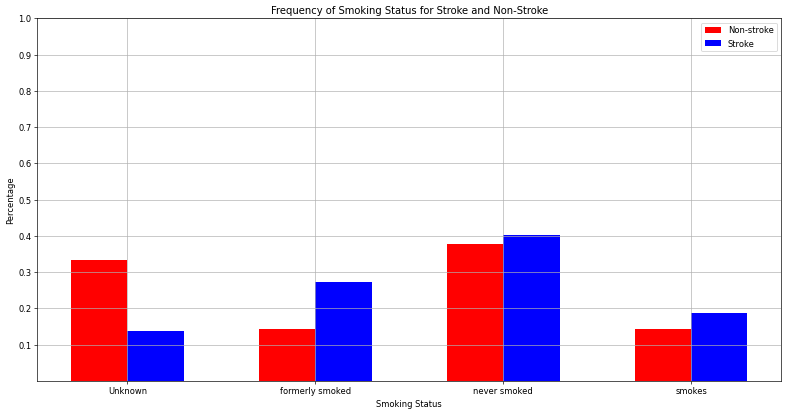

In [25]:
importlib.reload(myEDA.utils)
import myEDA.utils as eda_utils
importlib.reload(myEDA.plot_utils)
import myEDA.plot_utils as plot_utils

non_stroke = [] # class label is 0.0
stroke = [] # class label is 1.0
for row in table.data: # uncleaned data
    if row[-1] == 0.0:
        non_stroke.append(row) # row is 0.0, append to non-stroke
    else:
        stroke.append(row) # row is 1.0, append to stroke

smoking_non_stroke_values, smoking_non_stroke_count = eda_utils.get_frequencies(non_stroke, table.column_names, "smoking_status")
print(smoking_non_stroke_values)
print(smoking_non_stroke_count)
smoking_stroke_values, smoking_stroke_count = eda_utils.get_frequencies(stroke, table.column_names, "smoking_status")
print(smoking_stroke_values)
print(smoking_stroke_count)

for i in range(len(smoking_non_stroke_count)):
    value = smoking_non_stroke_count[i]
    smoking_non_stroke_count[i] = value / len(non_stroke)
print(smoking_non_stroke_count)
for i in range(len(smoking_stroke_count)):
    value = smoking_stroke_count[i]
    smoking_stroke_count[i] = value / len(stroke)
print(smoking_stroke_count)

plt.figure(figsize=(16, 8), dpi=60) # start of multiple frequency plot
ax = plt.gca()
b1 = ax.bar([1,2,3,4], smoking_non_stroke_count, 0.3, color="r")
b2 = ax.bar([1.3,2.3,3.3,4.3], smoking_stroke_count, 0.3, color="b")
ax.set_xticks([1.15, 2.15, 3.15, 4.15])
ax.set_yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
ax.set_xticklabels(smoking_stroke_values)
ax.legend((b1[0], b2[0]), ("Non-stroke", "Stroke"), loc=1)
ax.set_title("Frequency of Smoking Status for Stroke and Non-Stroke")
ax.set_xlabel("Smoking Status")
ax.set_ylabel("Percentage")
plt.grid(True)
plt.show()

#### BMI

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]
[87, 399, 231, 62, 10, 1, 1]
[1.0, 2.0, 3.0, 4.0, 5.0]
[3, 108, 79, 18, 1, 0.0, 0.0]
[0.10998735777496839, 0.504424778761062, 0.2920353982300885, 0.07838179519595449, 0.012642225031605562, 0.0012642225031605564, 0.0012642225031605564]
[0.014354066985645933, 0.5167464114832536, 0.37799043062200954, 0.0861244019138756, 0.004784688995215311, 0.0, 0.0]


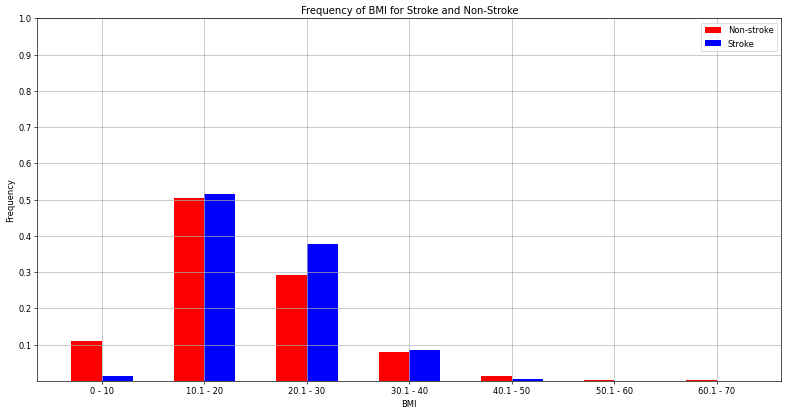

In [26]:
importlib.reload(myEDA.utils)
import myEDA.utils as eda_utils
importlib.reload(myEDA.plot_utils)
import myEDA.plot_utils as plot_utils

non_stroke = [] # class label is 0.0
stroke = [] # class label is 1.0
for row in numeric_table.data: # for cleaned data
    if row[-1] == 0.0:
        non_stroke.append(row) # row is 0.0, append to non-stroke
    else:
        stroke.append(row) # row is 1.0, append to stroke

bmi_non_stroke_values, bmi_non_stroke_count = eda_utils.get_frequencies(non_stroke, numeric_table.column_names, "bmi")
print(bmi_non_stroke_values)
print(bmi_non_stroke_count)
bmi_stroke_values, bmi_stroke_count = eda_utils.get_frequencies(stroke, numeric_table.column_names, "bmi")
print(bmi_stroke_values)
#print(bmi_stroke_count)

while len(bmi_non_stroke_count) > len(bmi_stroke_count):
    bmi_stroke_count.append(0.0)
print(bmi_stroke_count)

for i in range(len(bmi_non_stroke_count)):
    value = bmi_non_stroke_count[i]
    bmi_non_stroke_count[i] = value / len(non_stroke)
print(bmi_non_stroke_count)
for i in range(len(bmi_stroke_count)):
    value = bmi_stroke_count[i]
    bmi_stroke_count[i] = value / len(stroke)
print(bmi_stroke_count)

plt.figure(figsize=(16, 8), dpi=60) # start of multiple frequency plot
ax = plt.gca()
b1 = ax.bar([1,2,3,4,5,6,7], bmi_non_stroke_count, 0.3, color="r")
b2 = ax.bar([1.3,2.3,3.3,4.3,5.3,6.3,7.3], bmi_stroke_count, 0.3, color="b")
ax.set_xticks([1.15, 2.15, 3.15, 4.15,5.15,6.15,7.15])
ax.set_yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
ax.set_xticklabels(["0 - 10","10.1 - 20","20.1 - 30", "30.1 - 40", "40.1 - 50", "50.1 - 60", "60.1 - 70"])
ax.legend((b1[0], b2[0]), ("Non-stroke", "Stroke"), loc=1)
ax.set_title("Frequency of BMI for Stroke and Non-Stroke")
ax.set_xlabel("BMI")
ax.set_ylabel("Frequency")
plt.grid(True)
plt.show()


#### Heart Disease

[0.0, 1.0]
[763, 28]
[0.0, 1.0]
[169, 40]
[0.9646017699115044, 0.035398230088495575]
[0.8086124401913876, 0.19138755980861244]


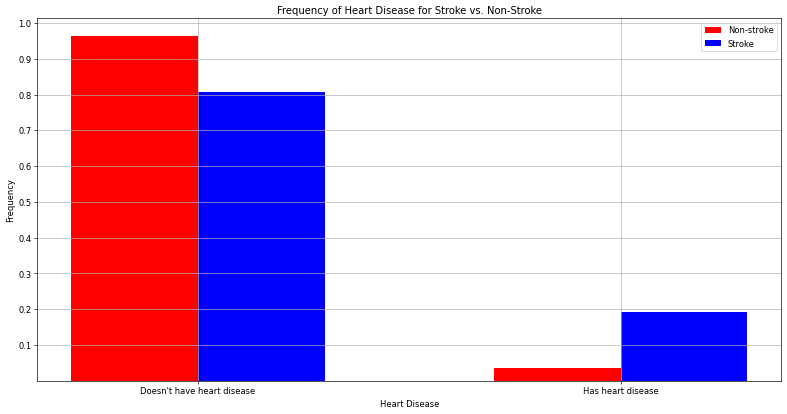

In [28]:
importlib.reload(myEDA.utils)
import myEDA.utils as eda_utils
importlib.reload(myEDA.plot_utils)
import myEDA.plot_utils as plot_utils

non_stroke = [] # class label is 0.0
stroke = [] # class label is 1.0
for row in table.data: # uncleaned data
    if row[-1] == 0.0:
        non_stroke.append(row) # row is 0.0, append to non-stroke
    else:
        stroke.append(row) # row is 1.0, append to stroke

heart_non_stroke_values, heart_non_stroke_count = eda_utils.get_frequencies(non_stroke, table.column_names, "heart_disease")
print(heart_non_stroke_values)
print(heart_non_stroke_count)
heart_stroke_values, heart_stroke_count = eda_utils.get_frequencies(stroke, table.column_names, "heart_disease")
print(heart_stroke_values)
print(heart_stroke_count)

for i in range(len(heart_non_stroke_count)):
    value = heart_non_stroke_count[i]
    heart_non_stroke_count[i] = value / len(non_stroke)
print(heart_non_stroke_count)
for i in range(len(heart_stroke_count)):
    value = heart_stroke_count[i]
    heart_stroke_count[i] = value / len(stroke)
print(heart_stroke_count)

heart_labels = []
for value in heart_stroke_values:
    if value == 0.0:
        heart_labels.append("Doesn't have heart disease")
    else:
        heart_labels.append("Has heart disease")

plt.figure(figsize=(16, 8), dpi=60) # start of multiple frequency plot
ax = plt.gca()
b1 = ax.bar([1,2], heart_non_stroke_count, 0.3, color="r")
b2 = ax.bar([1.3,2.3], heart_stroke_count, 0.3, color="b")
ax.set_xticks([1.15, 2.15])
ax.set_yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
ax.set_xticklabels(heart_labels)
ax.legend((b1[0], b2[0]), ("Non-stroke", "Stroke"), loc=1)
ax.set_title("Frequency of Heart Disease for Stroke vs. Non-Stroke")
ax.set_xlabel("Heart Disease")
ax.set_ylabel("Frequency")
plt.grid(True)
plt.show()

## Box and Whisker Plots

#### Average Glucose Levels

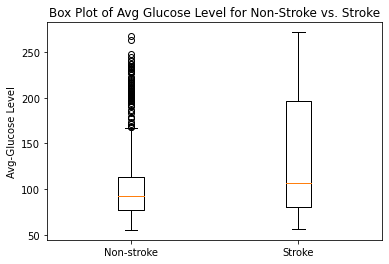

In [18]:
importlib.reload(myEDA.utils)
import myEDA.utils as eda_utils
importlib.reload(myEDA.plot_utils)
import myEDA.plot_utils as plot_utils

non_stroke = [] # class label is 0.0
stroke = [] # class label is 1.0
for row in table.data: # uncleaned data
    if row[-1] == 0.0:
        non_stroke.append(row) # row is 0.0, append to non-stroke
    else:
        stroke.append(row) # row is 1.0, append to stroke

glucose_non_stroke_values, glucose_non_stroke_count = eda_utils.get_frequencies(non_stroke, table.column_names, "avg_glucose_level")
#print(glucose_non_stroke_values)
#print(glucose_non_stroke_count)
glucose_stroke_values, glucose_stroke_count = eda_utils.get_frequencies(stroke, table.column_names, "avg_glucose_level")
#print(glucose_stroke_values)
#print(glucose_stroke_count)

myEDA.plot_utils.box_plot([glucose_non_stroke_values, glucose_stroke_values], \
    ["Non-stroke", "Stroke"], "Box Plot of Avg Glucose Level for Non-Stroke vs. Stroke", None, "Avg-Glucose Level")

#### BMI

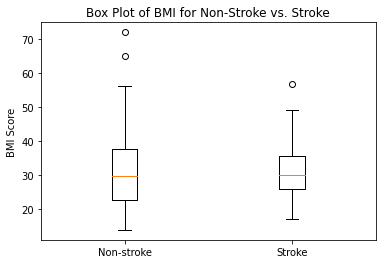

In [19]:
importlib.reload(myEDA.utils)
import myEDA.utils as eda_utils
importlib.reload(myEDA.plot_utils)
import myEDA.plot_utils as plot_utils

non_stroke = [] # class label is 0.0
stroke = [] # class label is 1.0
for row in table.data: # for uncleaned data
    if row[-1] == 0.0:
        non_stroke.append(row) # row is 0.0, append to non-stroke
    else:
        stroke.append(row) # row is 1.0, append to stroke

bmi_non_stroke_values, bmi_non_stroke_count = eda_utils.get_frequencies(non_stroke, table.column_names, "bmi")
#print(bmi_non_stroke_values)
#print(bmi_non_stroke_count)
bmi_stroke_values, bmi_stroke_count = eda_utils.get_frequencies(stroke, table.column_names, "bmi")
#print(bmi_stroke_values)
#print(bmi_stroke_count)

myEDA.plot_utils.box_plot([bmi_non_stroke_values, bmi_stroke_values], \
    ["Non-stroke", "Stroke"], "Box Plot of BMI for Non-Stroke vs. Stroke", None, "BMI Score")

#### Age

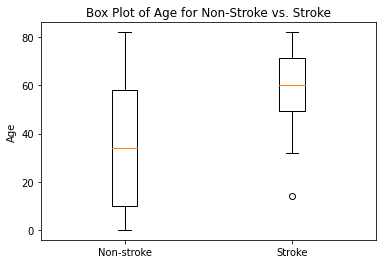

In [20]:
importlib.reload(myEDA.utils)
import myEDA.utils as eda_utils
importlib.reload(myEDA.plot_utils)
import myEDA.plot_utils as plot_utils

non_stroke = [] # class label is 0.0
stroke = [] # class label is 1.0
for row in table.data: # for uncleaned data
    if row[-1] == 0.0:
        non_stroke.append(row) # row is 0.0, append to non-stroke
    else:
        stroke.append(row) # row is 1.0, append to stroke

age_non_stroke_values, age_non_stroke_count = eda_utils.get_frequencies(non_stroke, table.column_names, "age")
#print(bmi_non_stroke_values)
#print(bmi_non_stroke_count)
age_stroke_values, age_stroke_count = eda_utils.get_frequencies(stroke, table.column_names, "age")
#print(bmi_stroke_values)
#print(bmi_stroke_count)

myEDA.plot_utils.box_plot([age_non_stroke_values, age_stroke_values], \
    ["Non-stroke", "Stroke"], "Box Plot of Age for Non-Stroke vs. Stroke", None, "Age")

## Pie Charts

#### Hypertension

[0.0, 1.0]
[729, 62]
[0.0, 1.0]
[149, 60]


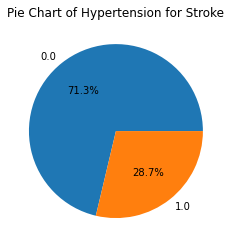

In [21]:
importlib.reload(myEDA.utils)
import myEDA.utils as eda_utils
importlib.reload(myEDA.plot_utils)
import myEDA.plot_utils as plot_utils

non_stroke = [] # class label is 0.0
stroke = [] # class label is 1.0
for row in numeric_table.data: # for cleaned data
    if row[-1] == 0.0:
        non_stroke.append(row) # row is 0.0, append to non-stroke
    else:
        stroke.append(row) # row is 1.0, append to stroke

hypertension_non_stroke_values, hypertension_non_stroke_count = eda_utils.get_frequencies(non_stroke, numeric_table.column_names, \
    "hypertension")
print(hypertension_non_stroke_values)
print(hypertension_non_stroke_count)
hypertension_stroke_values, hypertension_stroke_count = eda_utils.get_frequencies(stroke, numeric_table.column_names, \
    "hypertension")
print(hypertension_stroke_values)
print(hypertension_stroke_count)

myEDA.plot_utils.pie_chart(hypertension_stroke_values, hypertension_stroke_count, "Pie Chart of Hypertension for Stroke")

[0.0, 1.0]
[763, 28]
[0.0, 1.0]
[169, 40]


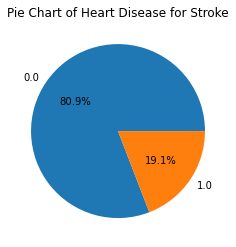

In [22]:
importlib.reload(myEDA.utils)
import myEDA.utils as eda_utils
importlib.reload(myEDA.plot_utils)
import myEDA.plot_utils as plot_utils

non_stroke = [] # class label is 0.0
stroke = [] # class label is 1.0
for row in table.data: # uncleaned data
    if row[-1] == 0.0:
        non_stroke.append(row) # row is 0.0, append to non-stroke
    else:
        stroke.append(row) # row is 1.0, append to stroke

heart_non_stroke_values, heart_non_stroke_count = eda_utils.get_frequencies(non_stroke, table.column_names, "heart_disease")
print(heart_non_stroke_values)
print(heart_non_stroke_count)
heart_stroke_values, heart_stroke_count = eda_utils.get_frequencies(stroke, table.column_names, "heart_disease")
print(heart_stroke_values)
print(heart_stroke_count)

myEDA.plot_utils.pie_chart(heart_stroke_values, heart_stroke_count, "Pie Chart of Heart Disease for Stroke")